In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('data/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [152]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [24]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [25]:
continuous_f = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_f = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_f

['cut', 'color', 'clarity']

In [155]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    53940
Name: count, dtype: int64

In [26]:
df.drop_duplicates(inplace=True)

In [7]:
df[continuous_f].describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df[categorical_f].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [160]:
df['clarity'].value_counts()


clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

In [27]:
df = df.drop(columns=['x','y','z'], axis=1)

In [28]:
continuous_f = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_f = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_f

['cut', 'color', 'clarity']

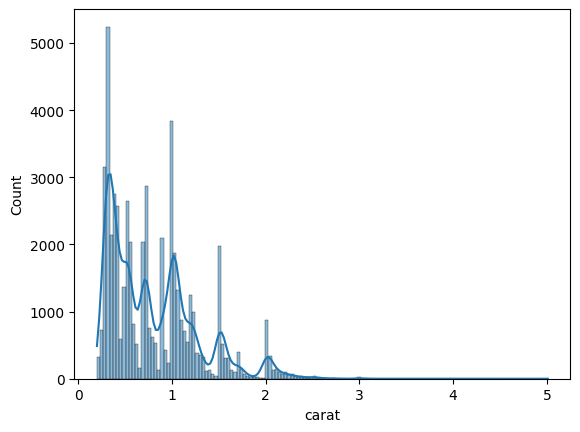

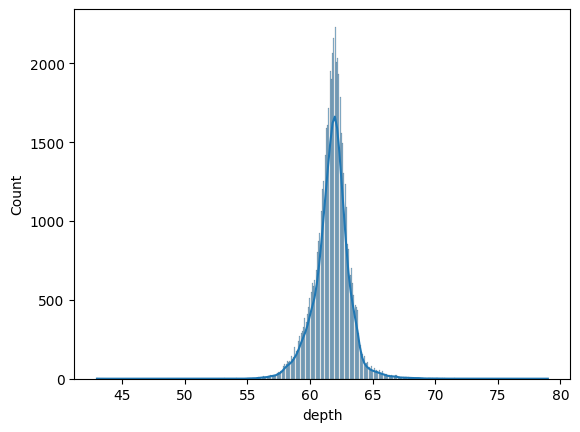

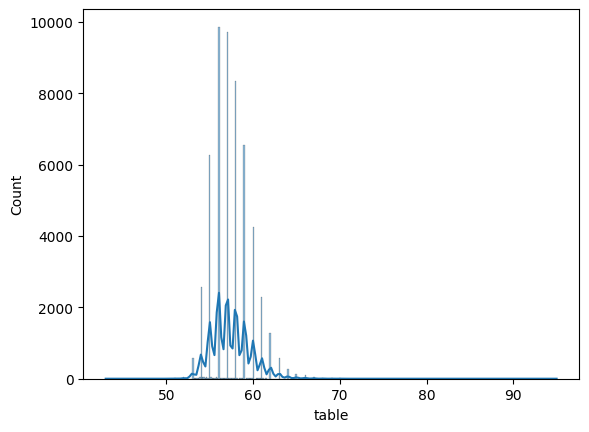

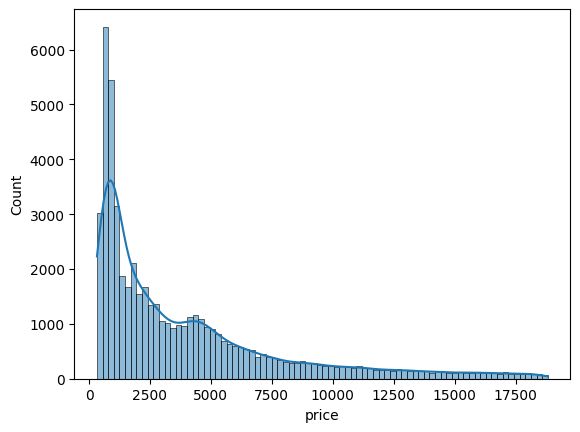

In [10]:
for i in continuous_f:
    sns.histplot(data=df,x = i, kde=True)
    print('\n')
    plt.show()
    

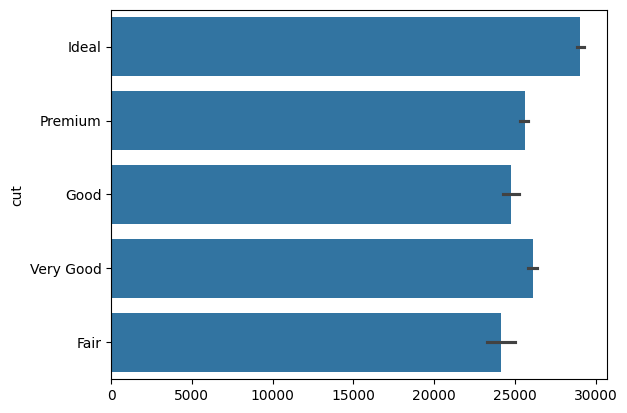

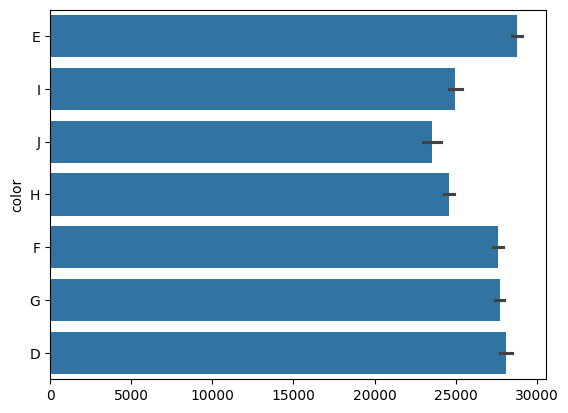

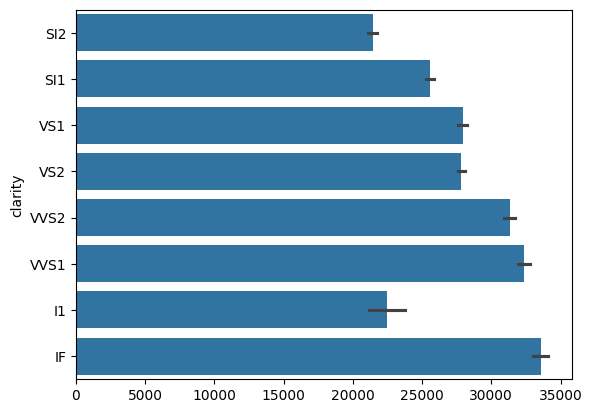

In [11]:
for i in categorical_f:
    sns.barplot(data=df[i])
    print('\n')
    plt.show()
    

<Axes: >

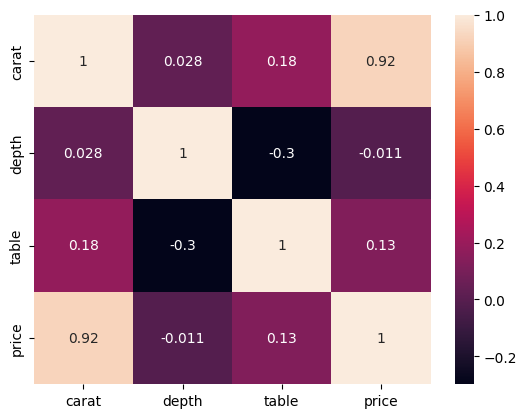

In [12]:
sns.heatmap(data = df[continuous_f].corr(), annot=True)

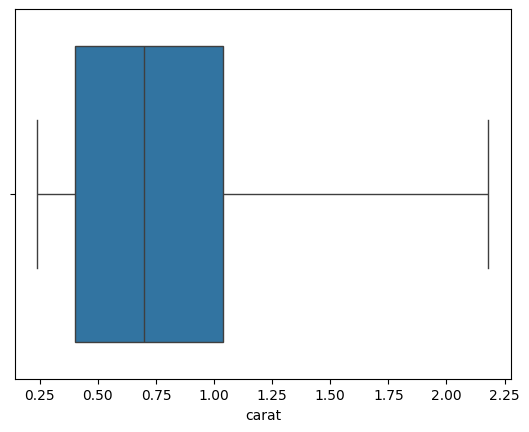

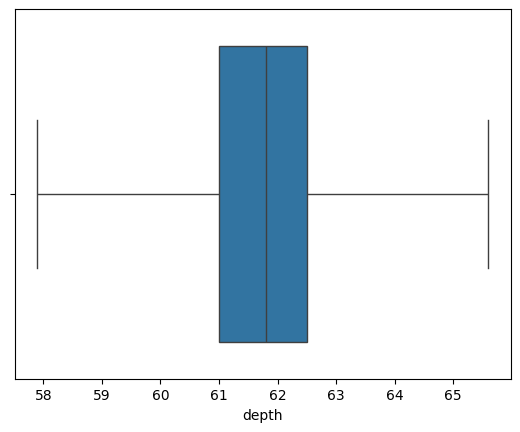

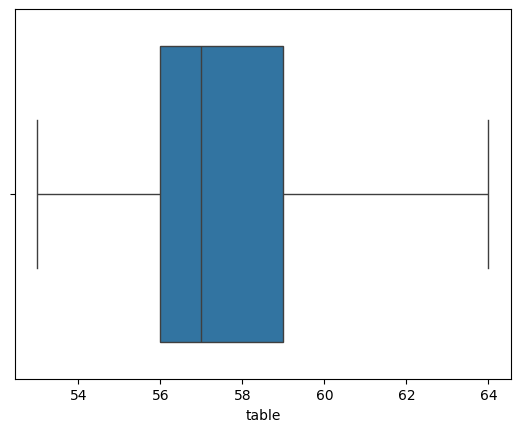

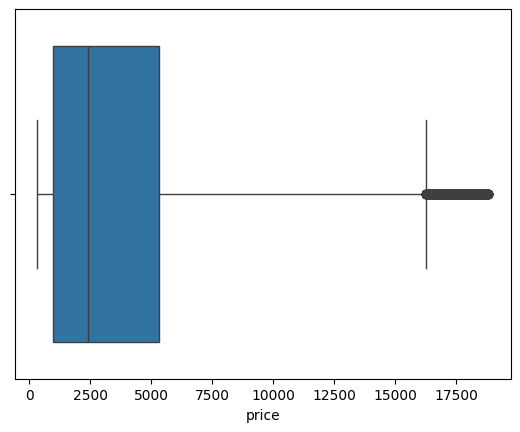

In [24]:

for i in continuous_f:
    sns.boxplot(data= df[continuous_f],x = i,whis=2.5)
    print('\n')
    plt.show()
    

In [29]:
import numpy as np
lower_limit = df['table'].quantile(0.01)
upper_limit = df['table'].quantile(0.99)
df['table'] = np.clip(df['table'], lower_limit, upper_limit)


In [32]:
df

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,64.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


In [31]:
cut_map= {'Fair': 1, 'Good':2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
clarity_map = {'SI1':3,'VS2':4,'SI2':2,'VS1':5,'VVS2':6,'VVS1':7,'IF':8,'I1':1}
color_map = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}


In [33]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [34]:
continuous_f = ['carat', 'depth', 'table']
df

,carat,cut,color,clarity,depth,table,price
0,0.23,5,2,2,61.5,55.0,326
1,0.21,4,2,3,59.8,61.0,326
2,0.23,2,2,5,56.9,64.0,327
3,0.29,4,6,4,62.4,58.0,334
4,0.31,2,7,2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,2757
53936,0.72,2,1,3,63.1,55.0,2757
53937,0.70,3,1,3,62.8,60.0,2757
53938,0.86,4,5,2,61.0,58.0,2757


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the selected features
df[continuous_f] = scaler.fit_transform(df[continuous_f])
df[categorical_f] = scaler.fit_transform(df[categorical_f])



In [36]:
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

In [39]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [30]:
# Define the Ridge regression model
ridge_model = Ridge()

# Define the range of alpha values for hyperparameter tuning
alphas = np.logspace(-6, 6, 13)

# Create a parameter grid for hyperparameter tuning
param_grid = {'alpha': alphas}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Instantiate the Ridge regression model with the best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha)

# Train the best model on the entire training data
best_ridge_model.fit(X_train, y_train)

# Evaluate the model on the cross-validation set
cv_score = best_ridge_model.score(X_cv, y_cv)

# Evaluate the model on the test set
test_score = best_ridge_model.score(X_test, y_test)

# Print results
print("Best Alpha:", best_alpha)
print("Cross-Validation Score on CV Set:", cv_score)
print("Test Set Score:", test_score)

Best Alpha: 1.0
Cross-Validation Score on CV Set: 0.9069757639093067
Test Set Score: 0.9104972709477729


In [18]:

# Define the Lasso regression model
lasso_model = Lasso()

# Define the range of alpha values for hyperparameter tuning
alphas = np.logspace(-6, 6, 13)

# Create a parameter grid for hyperparameter tuning
param_grid = {'alpha': alphas}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Instantiate the Lasso regression model with the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha)

# Train the best model on the entire training data
best_lasso_model.fit(X_train, y_train)

# Evaluate the model on the cross-validation set
cv_score = best_lasso_model.score(X_cv, y_cv)

# Evaluate the model on the test set
test_score = best_lasso_model.score(X_test, y_test)

cv_predictions = best_lasso_model.predict(X_cv)
cv_r2_score = r2_score(y_cv, cv_predictions)

# Evaluate the model on the test set
test_predictions = best_lasso_model.predict(X_test)
test_r2_score = r2_score(y_test, test_predictions)

# Print results
print("Best Alpha:", best_alpha)
print("Cross-Validation Score on CV Set:", cv_score)
print("Test Set Score:", test_score)
print("Cross-Validation Score on CV Set (R2):", cv_r2_score)
print("Test Set Score (R2):", test_r2_score)

Best Alpha: 0.001
Cross-Validation Score on CV Set: 0.9026745009965523
Test Set Score: 0.9079774796852693
Cross-Validation Score on CV Set (R2): 0.9026745009965523
Test Set Score (R2): 0.9079774796852693


In [52]:
models = {
                'LinearRegression': LinearRegression(),
                'Lasso': Lasso()
            }
report = {}
for i in range(len(models)):
        model = list(models.values())[i]
        if model == 'Lasso':
            alphas = np.logspace(-6, 6, 13)
            param_grid = {'alpha': alphas}
            
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            
            best_alpha = grid_search.best_params_['alpha']
            best_lasso_model = Lasso(alpha=best_alpha)
            best_lasso_model.fit(X_train, y_train)
            
            cv_score = best_lasso_model.score(X_cv, y_cv)
            test_score = best_lasso_model.score(X_test, y_test)
            print(test_score)
            report[list(models.keys())[i]] = test_score
            report[model_name] = test_score

            
            


In [55]:
models = {
                'LinearRegression': LinearRegression(),
                'Lasso': Lasso()
            }

for i in range(len(models)):
        model = list(models.keys())[i]
        print(model)

LinearRegression
Lasso


In [35]:
elastic_net_model = ElasticNet()

# Define the range of alpha values for hyperparameter tuning
alphas = np.logspace(-6, 6, 13)

# Define the range of l1_ratio values for Elastic Net
l1_ratios = np.linspace(0.1, 0.9, 9)

# Create a parameter grid for hyperparameter tuning
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Instantiate the Elastic Net regression model with the best hyperparameters
best_elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

# Train the best model on the entire training data
best_elastic_net_model.fit(X_train, y_train)

# Evaluate the model on the cross-validation set
cv_score = best_elastic_net_model.score(X_cv, y_cv)

# Evaluate the model on the test set
test_score = best_elastic_net_model.score(X_test, y_test)

# Print results
print("Best Alpha:", best_alpha)
print("Best L1 Ratio:", best_l1_ratio)
print("Cross-Validation Score on CV Set:", cv_score)
print("Test Set Score:", test_score)

Best Alpha: 0.0001
Best L1 Ratio: 0.6
Cross-Validation Score on CV Set: 0.9069758320470138
Test Set Score: 0.9104972597792074


In [56]:
from sklearn.tree import DecisionTreeRegressor


# Define the Decision Tree regression model
tree_model = DecisionTreeRegressor()

# Define the range of hyperparameters for tuning
param_grid = {
    'max_depth': [3,4, 5],
    'min_samples_split': [4, 5,6,7,8,9, 10],
    'min_samples_leaf': [4,5]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# Instantiate the Decision Tree regression model with the best hyperparameters
best_tree_model = DecisionTreeRegressor(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf
)

# Train the best model on the entire training data
best_tree_model.fit(X_train, y_train)

# Evaluate the model on the cross-validation set
cv_score = best_tree_model.score(X_cv, y_cv)

# Evaluate the model on the test set
test_score = best_tree_model.score(X_test, y_test)

# Print results
print("Best Max Depth:", best_max_depth)
print("Best Min Samples Split:", best_min_samples_split)
print("Best Min Samples Leaf:", best_min_samples_leaf)
print("Cross-Validation Score on CV Set:", cv_score)
print("Test Set Score:", test_score)

Best Max Depth: 5
Best Min Samples Split: 4
Best Min Samples Leaf: 4
Cross-Validation Score on CV Set: 0.9382126363698206
Test Set Score: 0.940649541745065


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score



# Define the Random Forest Regressor model
random_forest_model = RandomForestRegressor()

# Define the range of hyperparameters for tuning
param_grid = {
    'n_estimators': [250],
    'bootstrap': [True]
}


# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']


# Instantiate the Random Forest Regressor model with the best hyperparameters
best_random_forest_model = RandomForestRegressor(
    n_estimators=best_n_estimators,
  
)

# Train the best model on the entire training data
best_random_forest_model.fit(X_train, y_train)

# Predictions
y_cv_pred = best_random_forest_model.predict(X_cv)
y_test_pred = best_random_forest_model.predict(X_test)

# Calculate R2 scores
cv_r2 = r2_score(y_cv, y_cv_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Best Number of Estimators:", best_n_estimators)
print("Cross-Validation R2 Score on CV Set:", cv_r2)
print("Test Set R2 Score:", test_r2)


Best Number of Estimators: 250
Cross-Validation R2 Score on CV Set: 0.9803519279481338
Test Set R2 Score: 0.9798868099465179


In [1]:
from sklearn.svm import SVR

svr_model = SVR()

# Define the range of hyperparameters for tuning
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_kernel = grid_search.best_params_['kernel']
best_C = grid_search.best_params_['C']
best_epsilon = grid_search.best_params_['epsilon']
best_gamma = grid_search.best_params_['gamma']

# Instantiate the Support Vector Regressor model with the best hyperparameters
best_svr_model = SVR(kernel=best_kernel, C=best_C, epsilon=best_epsilon, gamma=best_gamma)

# Train the best model on the entire training data
best_svr_model.fit(X_train, y_train)

# Predictions
y_cv_pred = best_svr_model.predict(X_cv)
y_test_pred = best_svr_model.predict(X_test)

# Calculate R2 scores
cv_r2 = r2_score(y_cv, y_cv_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Best Kernel:", best_kernel)
print("Best C:", best_C)
print("Cross-Validation R2 Score on CV Set:", cv_r2)
print("Test Set R2 Score:", test_r2)

NameError: name 'GridSearchCV' is not defined

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have standardized features X_standardized and target variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model (you can replace this with other regression models)
model = RandomForestRegressor()

# Define hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# Choose an appropriate scoring metric (e.g., 'neg_mean_squared_error' for MSE)
scoring_metric = 'neg_mean_squared_error'

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_metric, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using the chosen scoring metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error on Test Set: 280937.14387158677


In [184]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

R-squared on Test Set: 0.9816543093204393


In [180]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Define the linear regression model
linear_model = LinearRegression()

# Optionally, you can perform hyperparameter tuning using GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}

grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error on Test Set: 1361541.7654570758


In [181]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

R-squared on Test Set: 0.910672123541944
